## Market Basket Analysis for E-commerce
####  This project involves the analysis of customers purchase behavior to uncover patterns to improve sales and customer satisfaction  

In [1]:
# Import pandas and plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:
# Loading the dataset
df_market = pd.read_csv("market.csv")

In [3]:
# Previewing the data
df_market.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# Number of rows and columns
df_market.shape
print(f'There are {df_market.shape[1]} columns and {df_market.shape[0]} rows in the dataset')

There are 3 columns and 38765 rows in the dataset


In [5]:
# Overview of the dataset
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
# Checking for null values
df_market.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
# Convert Date column data type to date
df_market['Date'] = pd.to_datetime(df_market['Date'])

In [10]:
# Renaming the columns
df_market.rename(columns= {'itemDescription':'Items', 'Member_number':'Member_id'}, inplace = True)

In [11]:
# Number of items, members and transactions
items = df_market.Items.nunique()
members = df_market.Member_id.nunique()
transaction = df_market.Member_id.count()
print ("Number of unique items: ", (items))
print ("Number of unique members: ", (members))
print ("Number of transactions made: ", (transaction))

Number of unique items:  167
Number of unique members:  3898
Number of transactions made:  38765


## Exploratory Data Analysis

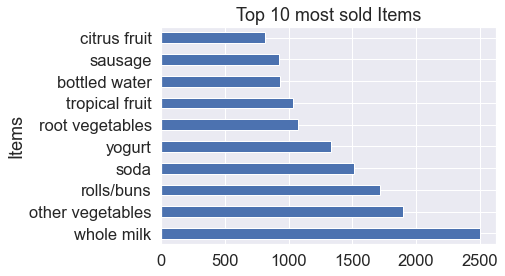

In [12]:
# Plotting the top 10 most sold items by count
df_market['Items'].value_counts(ascending=False) [:10].plot(kind= 'barh', title = 'Top 10 most sold Items')
plt.ylabel('Items')

plt.show()

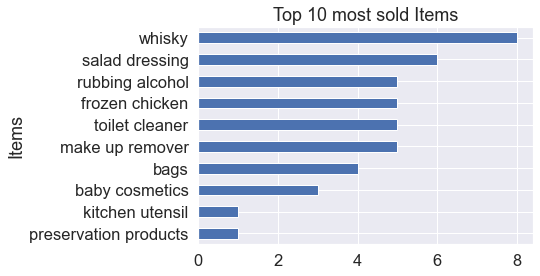

In [13]:
# Plotting the 10 least sold items by count
df_market['Items'].value_counts(ascending=True) [:10].plot(kind= 'barh', title = 'Top 10 most sold Items')
plt.ylabel('Items')

plt.show()

#### whole milk is the most sold item and preservation products is the least sold

In [14]:
# Creating unique transactions for each customer based on the items purchased by date
df_market['Transaction'] = df_market['Member_id'].astype(str) + '-' + df_market['Date'].astype(str)

In [15]:
# Crosstab is used to create a frequency table of the transactions
df_grouped = pd.crosstab(df_market['Transaction'], df_market['Items'])
df_grouped.head()

Items,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transaction,,,,,,,,,,,,,,,,,,,,,
1000-2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000-2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000-2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000-2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000-2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Encoding values to 0 and 1
    
df_basket = df_grouped.applymap(lambda x: 1 if x > 0 else 0)

## Generating association Rules
#### This requires the use of apriori algorithm to discover relationships or associations within the items in the transactions

In [17]:
# Importing apriori libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [18]:
# Generate frequent itemsets with minimum support of 0.005 
frequent_itemsets = apriori(df_basket, min_support=0.005,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by = 'zhangs_metric', ascending = False)
rules.head()

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
2,(canned beer),(whole milk),0.046916,0.157923,0.006015,0.128205,0.811821,-0.001394,0.965912,-0.195630
3,(whole milk),(canned beer),0.157923,0.046916,0.006015,0.038087,0.811821,-0.001394,0.990822,-0.215852
4,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040,-0.154748


In [19]:
# Length of the frequent itemsets
len(frequent_itemsets)

126

In [20]:
# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
      support                      itemsets
0    0.021386                    (UHT-milk)
1    0.008087               (baking powder)
2    0.033950                        (beef)
3    0.021787                     (berries)
4    0.016574                   (beverages)
..        ...                           ...
121  0.011629            (soda, whole milk)
122  0.005814                (soda, yogurt)
123  0.008220  (whole milk, tropical fruit)
124  0.005213      (yogurt, tropical fruit)
125  0.011161          (whole milk, yogurt)

[126 rows x 2 columns]


In [21]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(10)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

Cross-Selling Recommendations:
Customers who bought 'bottled beer' also bought 'whole milk'.
Customers who bought 'sausage' also bought 'whole milk'.
Customers who bought 'newspapers' also bought 'whole milk'.
Customers who bought 'domestic eggs' also bought 'whole milk'.
Customers who bought 'frankfurter' also bought 'whole milk'.
Customers who bought 'frankfurter' also bought 'other vegetables'.
Customers who bought 'pork' also bought 'whole milk'.
Customers who bought 'pip fruit' also bought 'whole milk'.
Customers who bought 'citrus fruit' also bought 'whole milk'.
Customers who bought 'shopping bags' also bought 'whole milk'.


In [22]:
rules_zhang= rules[rules['zhangs_metric'] > 0]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


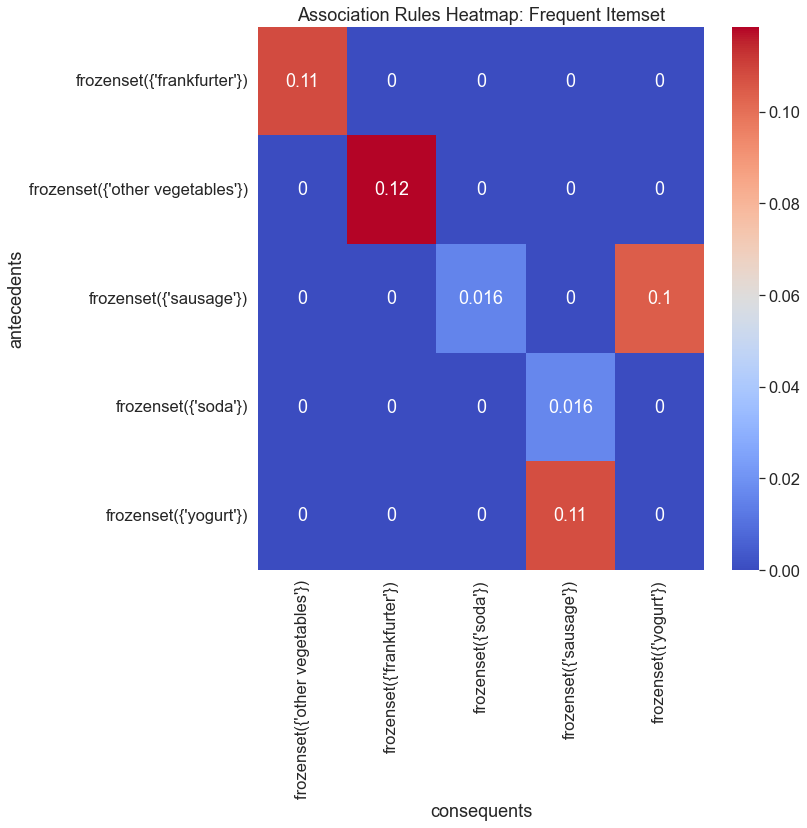

In [26]:
# Creating matrix and heatmap of association
association = rules_zhang.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
plt.figure(figsize=(10, 10))
sns.heatmap(association, annot=True, cmap='coolwarm')
plt.title('Association Rules Heatmap: Frequent Itemset')
plt.show()

## Summary

#### The most sold products are whole milk, other vegetables, rolls/buns, soda and yoghurt. These products are a driving force of sales in the supemaket. Items such as frankfurter and other vegetables, sausage and soda, yoghurt and soda are more likely to be purchased together

## Recommendations

#### The supermarket should be organized in a way that items more likely to be bought together should be arranged side by side for ease of access.

#### This is also useful in setting up an online store that will make recommendations to customers based on the products they have in their cart. 

#### Promotions and discounts can also be done for this items more likely to be bought together to drive people to buy more,